In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from CGAN import generator , discriminator

In [5]:
gen = generator()
disc = discriminator()

In [6]:
# Load Weights
checkpoint = torch.load('../models/CGAN100.pth',map_location=torch.device("cpu"))
epochs = checkpoint['epoch']
gen.load_state_dict(checkpoint['generator'])
disc.load_state_dict(checkpoint["discriminator"])
lr = checkpoint['lr_sched']
optG = torch.optim.Adam(gen.parameters(),lr=lr,betas=(0.5,0.999))
optD = torch.optim.Adam(disc.parameters(),lr=lr,betas=(0.5,0.999))
optG = checkpoint['optimizer_generator']
optD = checkpoint['optimizer_discriminator']

In [63]:
noise = torch.randn(10,100)
labels = torch.randint(0,10,(10,))
noise.shape , labels 

(torch.Size([10, 100]), tensor([3, 6, 6, 4, 5, 9, 2, 3, 5, 3]))

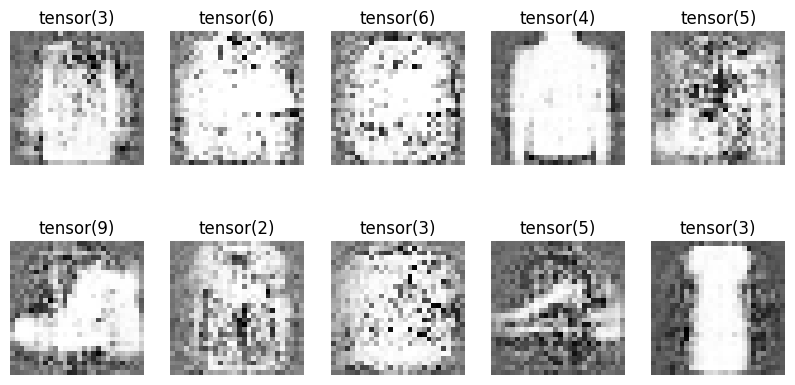

In [79]:
# show generated images
_ , axs = plt.subplots(nrows=2,ncols=5,figsize=(10,5))
axs = axs.ravel()
generated_images = gen(noise,labels)
for i , ax in enumerate(axs):
    ax.imshow(generated_images[i].detach().reshape(28,28),'gray');ax.set_title(labels[i])
    ax.axis(False)
plt.show()